Download/Read Dataset
---

In [1]:
from sklearn.datasets import fetch_mldata
raw = fetch_mldata("MNIST original")
raw

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

Pull Out Data and Labels
---

In [2]:
mnist = raw["data"]
mnist_labels = raw["target"]

Split Into Train/Test
---

In [3]:
mnist_train = mnist[:60000]
mnist_labels_train = mnist_labels[:60000]

mnist_test = mnist[60000:]
mnist_labels_test = mnist_labels[60000:]

Shuffle The Training Indices
---

In [4]:
import numpy as np
shuffle_indices = np.random.permutation(60000)
mnist_train = mnist_train[shuffle_indices]
mnist_labels_train = mnist_labels_train[shuffle_indices]

Train the Model
---

In [5]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(mnist_train, mnist_labels_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

Make a Prediction
---

[ 5.]


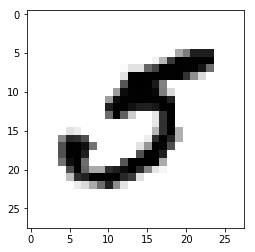

In [6]:
print(sgd_clf.predict([mnist[36000]]))

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.imshow(mnist[36000].reshape(28, 28), cmap=matplotlib.cm.binary, interpolation="nearest")

In [7]:
scores = sgd_clf.decision_function([mnist[36000]])
scores

array([[  22994.86463196, -304381.11846159, -298256.94736998,
        -154788.11486371, -405149.56888245,  198566.31996982,
        -850024.59955663, -219433.49211561, -671670.11769741,
        -683048.60098038]])

One-Versus-One Classification
---

In [8]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(mnist_train, mnist_labels_train)
ovo_clf.predict([mnist[36000]])

array([ 5.])

Random Forest
---

In [11]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(mnist_train, mnist_labels_train)
forest_clf.predict([mnist[36000]])

array([ 5.])

In [12]:
forest_clf.predict_proba([mnist[36000]])

array([[ 0. ,  0. ,  0. ,  0.1,  0. ,  0.9,  0. ,  0. ,  0. ,  0. ]])

Evaluate Models
---

- Accuracy, better than randomely guessing!

In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
cross_val_score(sgd_clf, mnist_train, mnist_labels_train, cv=3, scoring="accuracy")

array([ 0.86842631,  0.87339367,  0.82162324])

In [17]:
cross_val_score(ovo_clf, mnist_train, mnist_labels_train, cv=3, scoring="accuracy")

array([ 0.90981804,  0.89374469,  0.91008651])

In [18]:
cross_val_score(forest_clf, mnist_train, mnist_labels_train, cv=3, scoring="accuracy")

array([ 0.9410118 ,  0.93774689,  0.93924089])

In [20]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

- Confusion Matrices

In [24]:
sgd_train_predict = cross_val_predict(sgd_clf, mnist_train, mnist_labels_train, cv=3)
sgd_train_cm = confusion_matrix(mnist_labels_train, sgd_train_predict)

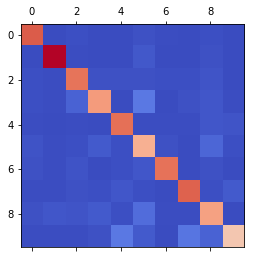

In [25]:
plt.matshow(sgd_train_cm, cmap=plt.cm.coolwarm)

In [26]:
ovo_train_predict = cross_val_predict(ovo_clf, mnist_train, mnist_labels_train, cv=3)
ovo_train_cm = confusion_matrix(mnist_labels_train, ovo_train_predict)

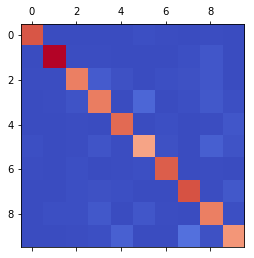

In [30]:
plt.matshow(ovo_train_cm, cmap=plt.cm.coolwarm)

In [31]:
forest_train_predict = cross_val_predict(forest_clf, mnist_train, mnist_labels_train, cv=3)
forest_train_cm = confusion_matrix(mnist_labels_train, forest_train_predict)

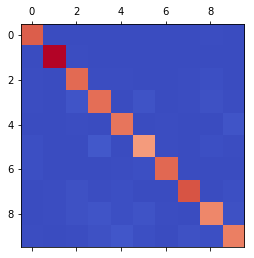

In [32]:
plt.matshow(forest_train_cm, cmap=plt.cm.coolwarm)

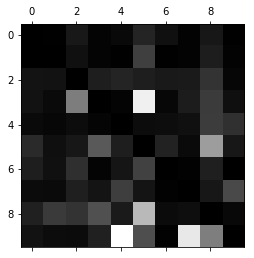

In [35]:
sgd_row_sums = sgd_train_cm.sum(axis=1, keepdims=True)
sgd_train_norm_cm = sgd_train_cm / sgd_row_sums

np.fill_diagonal(sgd_train_norm_cm, 0)
plt.matshow(sgd_train_norm_cm, cmap=plt.cm.coolwarm)